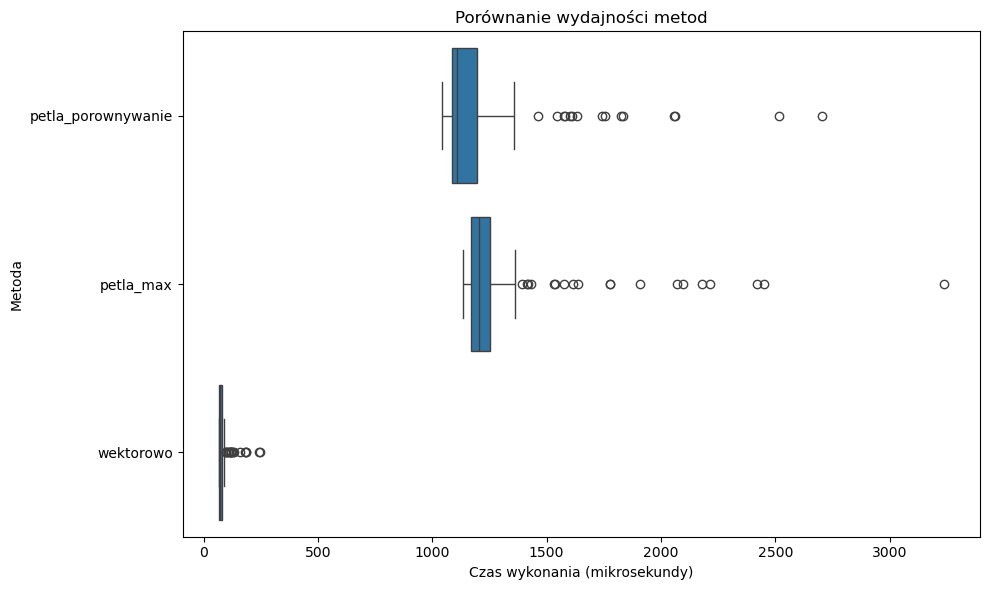

                    count         mean         std          min          25%  \
method                                                                         
petla_max           100.0  1325.967312  339.947700  1132.011414  1167.833805   
petla_porownywanie  100.0  1226.162910  296.821030  1043.796539  1084.983349   
wektorowo           100.0    84.297657   34.061755    65.803528    68.902969   

                            50%          75%          max  
method                                                     
petla_max           1204.133034  1253.485680  3237.009048  
petla_porownywanie  1107.573509  1195.847988  2704.858780  
wektorowo             71.406364    78.201294   246.047974  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import seaborn as sns

t = np.arange(0, 2.001, 0.001)  # sekwencja od 0 do 2 z krokiem 0.001
x = np.random.normal(size=2001)  #  dane losowane z rozkładu normalnego

# Funkcje do porównania
def petla_porownywanie():
    a3 = 0
    for i in range(2001):
        a_temp = abs(x[i] - np.cos(t[i]))
        if a_temp > a3:
            a3 = a_temp
    return a3

def petla_max():
    a_temp = np.zeros(2001)
    for i in range(2001):
        a_temp[i] = abs(x[i] - np.cos(t[i]))
    a2 = max(a_temp)
    return a2

def wektorowo():
    a1 = max(abs(x - np.cos(t)))
    return a1

num_repeats = 100

results = {
    'petla_porownywanie': [],
    'petla_max': [],
    'wektorowo': []
}

for _ in range(num_repeats):
    start = time.time()
    petla_porownywanie()
    end = time.time()
    results['petla_porownywanie'].append((end - start) * 1e6)  # mikrosekundy
    
    start = time.time()
    petla_max()
    end = time.time()
    results['petla_max'].append((end - start) * 1e6)
    
    start = time.time()
    wektorowo()
    end = time.time()
    results['wektorowo'].append((end - start) * 1e6)

df_results = pd.DataFrame({
    'method': ['petla_porownywanie'] * num_repeats + ['petla_max'] * num_repeats + ['wektorowo'] * num_repeats,
    'time': results['petla_porownywanie'] + results['petla_max'] + results['wektorowo']
})

plt.figure(figsize=(10, 6))
sns.boxplot(y='method', x='time', data=df_results)
plt.title('Porównanie wydajności metod')
plt.ylabel('Metoda')
plt.xlabel('Czas wykonania (mikrosekundy)')
plt.tight_layout()
plt.show()

summary = df_results.groupby('method')['time'].describe()
print(summary)